# Python Assignment


|Name|examnr.|
|----|-------|
|Ying Luo|2007491|
|Borja Casado|2016493|

## Question

Is the issue of gender inequality important enough to talk about on Twitter in India?



## Motivation
Gender Inequality, in simple words, may be defined as discrimination against women based on their sex. This peculiar type of discrimination against women is prevalent everywhere in the world and more so in Indian society. According to the Global Gender Gap Report released by the [World Economic Forum](https://www.weforum.org/events/world-economic-forum-annual-meeting-2018) (WEF) in 2014, India was ranked 114 on the Gender Gap Index (GGI) among 142 countries polled. When broken down into components of the GGI, India performs well on political empowerment, but is scored bad on Economic participation(134th) and opportunity, India also scores poorly on overall female to male literacy (126th) and health rankings (141th).

The root cause of gender inequality in Indian society lies in its patriarchy system. According to the famous sociologists Sylvia Walby, patriarchy is "a system of social structure and practices in which men dominate, oppress and exploit women". Women's exploitation is an age old cultural phenomenon of Indian society. The system of patriarchy finds its validity and sanction in our religious beliefs, whether it is Hindu, Muslim or any other religion.

Although there has been an increasing focus on women's empowerment in India, especially on how to economically empower women through education and work but on the ground there are not enough visible changes. The change will appear only when the mind set of Indian society changes; when society starts treating male and female on equal footing and when a girl is not considered as a burden. Twitter, as one of the most popular social network, there were 23.2 million ([Statista](https://www.statista.com/statistics/381832/twitter-users-india/)) monthly active users in India, we would like to see whether this is an active issue in Twitter, by interpreting India's trending topics in order to see what people is saying about #feminism and by looking at two related indicators from [The World Bank](https://data.worldbank.org/).


## Method

To get a simple but clear picture of woman's empowerment in india, we request information from World Bank data API’s, [wbdata](http://wbdata.readthedocs.io/en/latest/) to obtain Labour force female (% of total labour force) and Secondary education, pupils (% female). The first indicator shows us women's perfomance in the labour market and the second gives us an understanding of the proportion of women in secondary education, which is the most crucial for them to progress and become more powerful.

As we know, social media is becoming more and more important when it comes to communication and knowledge. Twitter, is a free network where everybody can express their thoughts and therefore is very useful when we want to interpret people behaviour by looking at trending topics. We can infer some conclusions given some keywords that people use more often or given the popularity of certain twit or personality, and that is what we did here. We first need to access the data. In order to mine data from [Twitter](https://twitter.com/), we first created a developer app in [Twitter API](https://apps.twitter.com/) so that we could get access. Then, we chose the country we are interested in by inserting the country's [Where On Earth ID](http://woeid.rosselliot.co.nz/) and then after acquiring India's trending topics, we filtered them by the keyword #feminism in order to see what people talk about it. We interpreted how popular feminism is in twitter by looking at the trending topics, hashtags as well as who is popular when it comes to talk about feminism.  


## Answer

Yes, indian people do care about feminism. India is a country where many things have to be done yet and gender equality is one of them. However, we learn from the world bank data that its secondary education is improving over time and that will lead to a better women perfomance in the labour market. On the other hand, the labour market still show a big gap between men and women and the wish to make changes is captured in twitter through people claims when they talk about #feminism. 



## Extracting Data

In [65]:
#Libraries imported

import wbdata 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import twitter
from prettytable import PrettyTable
import datetime 
import requests


Let's first have a look at the indicators that show a clear picture of the women's perfomance in India.

In [58]:
#set up the country we want

countries = ["IND"]

In [59]:
#set up the indicator we want by building a dictionary

indicators = {'SL.TLF.TOTL.FE.ZS':'Labour force female', 'SE.SEC.ENRL.FE.ZS':'Sec. Ed. Pupils% Female'}


In [60]:
#grab indicators above for India and load into a data frame

df = wbdata.get_dataframe(indicators, country=countries, convert_date=False)

In [61]:
#To make it more relevant, we get data for the last 10 years

ind_lff = df.iloc[[1,2,3,4,5,6,7,8,9,10],[0]] #India labour force indicator for the past 10 years
ind_se = df.iloc[[1,2,3,4,5,6,7,8,9,10],[1]] #India secondary education indicator for the past 10 years

print(ind_lff)
print(ind_se)

      Labour force female
date                     
2016            24.693361
2015            24.521093
2014            24.378622
2013            24.235051
2012            24.097772
2011            24.563874
2010            25.037949
2009            25.920097
2008            26.805637
2007            27.691578
      Sec. Ed. Pupils% Female
date                         
2016                      NaN
2015                47.599850
2014                47.645618
2013                47.573021
2012                46.148151
2011                45.981621
2010                45.621319
2009                45.494831
2008                44.578659
2007                43.972580


As the data comes in downwards trend, we need to manipulate it and revert it so that the following plots make sense..

In [62]:
#Correcting the trend by using reindex.

ind_lff = ind_lff.sort_index(axis=1 ,ascending=True)
ind_lff = ind_lff.reindex(index=ind_lff.index[::-1])
ind_se = ind_se.sort_index(axis=1 ,ascending=True)
ind_se = ind_se.reindex(index=ind_se.index[::-1])

print(ind_lff)
print(ind_se)

      Labour force female
date                     
2007            27.691578
2008            26.805637
2009            25.920097
2010            25.037949
2011            24.563874
2012            24.097772
2013            24.235051
2014            24.378622
2015            24.521093
2016            24.693361
      Sec. Ed. Pupils% Female
date                         
2007                43.972580
2008                44.578659
2009                45.494831
2010                45.621319
2011                45.981621
2012                46.148151
2013                47.573021
2014                47.645618
2015                47.599850
2016                      NaN


And we finally plot the customized graphs.

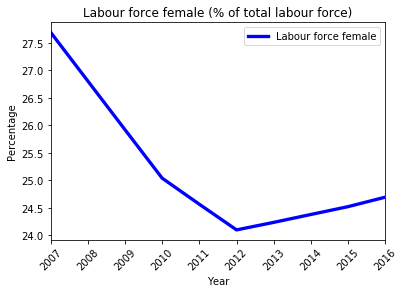

In [91]:
ind_lff.plot(color="blue", linewidth=3.3)
plt.rcParams['axes.facecolor'] = 'white'
plt.title("Labour force female (% of total labour force)")
plt.ylabel("Percentage")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.show()

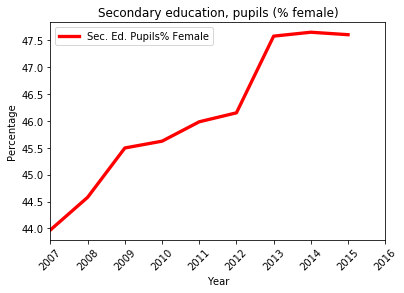

In [92]:
ind_se.plot(color="red", linewidth=3.3)
plt.rcParams['axes.facecolor'] = 'white'
plt.title("Secondary education, pupils (% female)")
plt.ylabel("Percentage")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.show()

As we can see from the first graph that women's performance in the labour market has been going worse despite of a slight increase in recent years. It implies that men are still the vast majority at work and there is a long way to go for woman to be financially independent and equal.

The second graph shows that proportion of female pupils in secondary education has been improving significantly since 2012. This tells us that the progress to gender equality has been made as education is the first pillar that should be improved before expecting any change in the labour market.



Let's now begin to extract the data from Twitter for the trending topics of today 27-01-2018

In [2]:
#In order to access to Twitter data, we have to acquire the convenient developer credentials by using Twitter API.

CONSUMER_KEY = ''
CONSUMER_SECRET = ''
OAUTH_TOKEN = ''
OAUTH_TOKEN_SECRET = ''

auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                           CONSUMER_KEY, CONSUMER_SECRET)

twitter_api = twitter.Twitter(auth=auth)

print (twitter_api)

In [49]:
#India's Where On Earth ID

IN_WOE_ID = 23424848 #India

#And then we list the trends so that we can know who influence more by keywords

in_trends = twitter_api.trends.place(_id=IN_WOE_ID)

#We print the lists out

print(in_trends)


[{'trends': [{'name': '#Kasganj', 'url': 'http://twitter.com/search?q=%23Kasganj', 'promoted_content': None, 'query': '%23Kasganj', 'tweet_volume': 28530}, {'name': 'Shami', 'url': 'http://twitter.com/search?q=Shami', 'promoted_content': None, 'query': 'Shami', 'tweet_volume': 16510}, {'name': '#Kabul', 'url': 'http://twitter.com/search?q=%23Kabul', 'promoted_content': None, 'query': '%23Kabul', 'tweet_volume': 14312}, {'name': '#MuniTarunSagarwithJC', 'url': 'http://twitter.com/search?q=%23MuniTarunSagarwithJC', 'promoted_content': None, 'query': '%23MuniTarunSagarwithJC', 'tweet_volume': None}, {'name': '#KERDEL', 'url': 'http://twitter.com/search?q=%23KERDEL', 'promoted_content': None, 'query': '%23KERDEL', 'tweet_volume': None}, {'name': 'Dean Elgar', 'url': 'http://twitter.com/search?q=%22Dean+Elgar%22', 'promoted_content': None, 'query': '%22Dean+Elgar%22', 'tweet_volume': None}, {'name': '#BhaagamathieMakingVideo', 'url': 'http://twitter.com/search?q=%23BhaagamathieMakingVideo',

As the output is printed out as Native Python data structures, we should import JSON in order to convert the text in pretty printing (more readable).

In [50]:
#Importing JSON

import json

#Printing a more readable version of the lists of trends and we sort each trend by using the option True in sort_keys


print (json.dumps(in_trends, indent=1, sort_keys=True))


[
 {
  "as_of": "2018-01-27T15:43:19Z",
  "created_at": "2018-01-27T15:42:17Z",
  "locations": [
   {
    "name": "India",
    "woeid": 23424848
   }
  ],
  "trends": [
   {
    "name": "#Kasganj",
    "promoted_content": null,
    "query": "%23Kasganj",
    "tweet_volume": 28530,
    "url": "http://twitter.com/search?q=%23Kasganj"
   },
   {
    "name": "Shami",
    "promoted_content": null,
    "query": "Shami",
    "tweet_volume": 16510,
    "url": "http://twitter.com/search?q=Shami"
   },
   {
    "name": "#Kabul",
    "promoted_content": null,
    "query": "%23Kabul",
    "tweet_volume": 14312,
    "url": "http://twitter.com/search?q=%23Kabul"
   },
   {
    "name": "#MuniTarunSagarwithJC",
    "promoted_content": null,
    "query": "%23MuniTarunSagarwithJC",
    "tweet_volume": null,
    "url": "http://twitter.com/search?q=%23MuniTarunSagarwithJC"
   },
   {
    "name": "#KERDEL",
    "promoted_content": null,
    "query": "%23KERDEL",
    "tweet_volume": null,
    "url": "http:/

In [51]:
#We set our keyword variableOur keyword is #feminism

q = '#feminism'

count = 100

search_results = twitter_api.search.tweets(q=q, count=count)

statuses = search_results['statuses']

# We set a loop with the aim foriterate through 5 more batches of results by following the cursor

for _ in range(5):
    print ("Length of statuses"), len(statuses)
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError: # No more results when next_results doesn't exist
        break
        
    # Create a dictionary from next_results
    
    kwargs = dict([ kv.split('=') for kv in next_results[1:].split("&") ])
    
    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']

# Show one sample search result by slicing the list to see what we have

print (json.dumps(statuses[0], indent=1))

Length of statuses
{
 "created_at": "Sat Jan 27 15:42:00 +0000 2018",
 "id": 957277519278874624,
 "id_str": "957277519278874624",
 "text": "Pakistani feminist banned by @Facebook for criticizing those who victim blamed (on religious grounds) a 7-year old\u2026 https://t.co/rNDkGyD9jM",
 "truncated": true,
 "entities": {
  "hashtags": [],
  "symbols": [],
  "user_mentions": [
   {
    "screen_name": "facebook",
    "name": "Facebook",
    "id": 2425151,
    "id_str": "2425151",
    "indices": [
     29,
     38
    ]
   }
  ],
  "urls": [
   {
    "url": "https://t.co/rNDkGyD9jM",
    "expanded_url": "https://twitter.com/i/web/status/957277519278874624",
    "display_url": "twitter.com/i/web/status/9\u2026",
    "indices": [
     116,
     139
    ]
   }
  ]
 },
 "metadata": {
  "iso_language_code": "en",
  "result_type": "recent"
 },
 "source": "<a href=\"https://about.twitter.com/products/tweetdeck\" rel=\"nofollow\">TweetDeck</a>",
 "in_reply_to_status_id": null,
 "in_reply_to_status

We collect screen names, hashtags and status:

In [52]:
status_texts = [ status['text'] 
                 for status in statuses ]

screen_names = [ user_mention['screen_name'] 
                 for status in statuses
                     for user_mention in status['entities']['user_mentions'] ]

hashtags = [ hashtag['text'] 
             for status in statuses
                 for hashtag in status['entities']['hashtags'] ]

# Compute a collection of all words from all tweets
words = [ w 
          for t in status_texts 
              for w in t.split() ]

# Explore the first 5 items for each

print (json.dumps(status_texts[0:5], indent=1))
print (json.dumps(screen_names[0:5], indent=1))
print (json.dumps(hashtags[0:5], indent=1))
print (json.dumps(words[0:5], indent=1))

[
 "Pakistani feminist banned by @Facebook for criticizing those who victim blamed (on religious grounds) a 7-year old\u2026 https://t.co/rNDkGyD9jM",
 "RT @WomenThrive: The discussions on #feminism, #MeToo , #equalpay, #genderinequality etc. at #WEF2018 are a huge step for gender equality w\u2026",
 "\"Teach your daughters less about fitting into glass slippers and more about shattering glass ceilings\".\u2026 https://t.co/0n5j3DnZ1P",
 "\u201cEnsinaste-me que cada um de n\u00f3s vem a este mundo para ganhar experi\u00eancia e aprender uma li\u00e7\u00e3o e que cada pessoa qu\u2026 https://t.co/Tp62LXTP5k",
 "17 Instagram accounts that demonstrate the importance of #feminism in 2018 https://t.co/RWU9oY5kNC"
]
[
 "facebook",
 "WomenThrive",
 "YouTube",
 "Nero",
 "MoscowTimes"
]
[
 "feminism",
 "MeToo",
 "equalpay",
 "genderinequality",
 "WEF2018"
]
[
 "Pakistani",
 "feminist",
 "banned",
 "by",
 "@Facebook"
]


In [93]:
#We make a table to count the frequency of words in related twits

from collections import Counter

for item in [words, screen_names, hashtags]:
    c = Counter(item)
    print (c.most_common()[:10]) # top 10
    print

[('the', 33), ('#feminism', 33), ('RT', 23), ('a', 21), ('to', 18), ('of', 16), ('is', 16), ('on', 15), ('are', 13), ('as', 12)]
[('MoscowTimes', 10), ('conservmillen', 3), ('Garymbparty', 2), ('facebook', 1), ('WomenThrive', 1), ('YouTube', 1), ('Nero', 1), ('cchukudebelu', 1), ('nazifumie', 1), ('H_Combs', 1)]
[('feminism', 36), ('Feminism', 13), ('genderequality', 9), ('MeToo', 4), ('sexualharassment', 2), ('Women', 2), ('GenderEquality', 2), ('Canada', 2), ('equality', 2), ('equalpay', 1)]


In [94]:
#By using PrettyTable we can disploy the following tables so that we can interpret.

for label, data in (('Word', words), 
                    ('Screen Name', screen_names), 
                    ('Hashtag', hashtags)):
    pt = PrettyTable(field_names=[label, 'Count']) 
    c = Counter(data)
    [ pt.add_row(kv) for kv in c.most_common()[:10] ]
    pt.align[label], pt.align['Count'] = 'l', 'r' # Set column alignment
    print (pt)

+-----------+-------+
| Word      | Count |
+-----------+-------+
| the       |    33 |
| #feminism |    33 |
| RT        |    23 |
| a         |    21 |
| to        |    18 |
| of        |    16 |
| is        |    16 |
| on        |    15 |
| are       |    13 |
| as        |    12 |
+-----------+-------+
+---------------+-------+
| Screen Name   | Count |
+---------------+-------+
| MoscowTimes   |    10 |
| conservmillen |     3 |
| Garymbparty   |     2 |
| facebook      |     1 |
| WomenThrive   |     1 |
| YouTube       |     1 |
| Nero          |     1 |
| cchukudebelu  |     1 |
| nazifumie     |     1 |
| H_Combs       |     1 |
+---------------+-------+
+------------------+-------+
| Hashtag          | Count |
+------------------+-------+
| feminism         |    36 |
| Feminism         |    13 |
| genderequality   |     9 |
| MeToo            |     4 |
| sexualharassment |     2 |
| Women            |     2 |
| GenderEquality   |     2 |
| Canada           |     2 |
| equalit

For curiosity, we can also see whether people is saying some certain words. 

In [120]:
#Do people say the word "violation" when they talk about feminism?
'violation' in ('Word', words)[1]

True

Apparently people do.

## Conclusion

Gender inequality has been a severe problem in India for centuries, even until today, we can still see unfortunate news like 'girls rape', 'violence against woman'. There are many statistical evidences could show how bad the situation is. Due to some limitations, we only extract two indicators from world bank dataset to give us a subtle but representative image of female status in India on work and education respectively. These two indicators have shown us that at least woman empowerment has been improved in recent years, no matter how bad it is initially.  

Along with it, we can see from twitter data that 'feminism' has been a popular topic in India. The most interesting thing that turns out is the usage of hashtags where people clearly claim more equality by using them such as "genderequality", "sexualHarassment", "MeToo", "equalpay" etc. Regarding the screen names that are in the trending list, people is interacting with them where we can see international platforms like Facebook, YouTube or Moscow Times that are known to be very aware of the gender equality issue. 

Therefore, we conclude that Indian people do care about the issue of gender inequality and we can surely say that there is a claim or wish among twitter users to make real changes and make the gender parity more equal.